# Week 2: Python Fundamentals for AI/ML
**Duration:** 1 Hour  
**Target:** Advanced High School Students

## Learning Objectives
By the end of this session, students will be able to:
- Read and write files using Python's built-in functions and pandas
- Create and use Python classes for data organization
- Generate basic visualizations using matplotlib, seaborn, and plotly
- Perform data manipulation operations using pandas with real-world datasets

---

## Part 1: File Operations (15 minutes)

### 1.1 Built-in File Operations

```python
# Reading a text file
with open('data.txt', 'r') as file:
    content = file.read()
    print(content)

# Writing to a file
data = ["Name,Age,Score", "Alice,16,95", "Bob,17,87", "Charlie,16,92"]
with open('students.csv', 'w') as file:
    for line in data:
        file.write(line + '\n')

# Reading line by line (memory efficient)
with open('students.csv', 'r') as file:
    for line in file:
        print(line.strip())
```

### 1.2 File Operations with Pandas

```python
import pandas as pd

# Reading different file formats
df_csv = pd.read_csv('students.csv')
df_excel = pd.read_excel('data.xlsx', sheet_name='Sheet1')
df_json = pd.read_json('data.json')

# Writing files
df.to_csv('output.csv', index=False)
df.to_excel('output.xlsx', index=False, sheet_name='Results')
df.to_json('output.json', orient='records')

# Reading with specific parameters
df = pd.read_csv('messy_data.csv',
                 sep=';',           # Different separator
                 skiprows=2,        # Skip first 2 rows
                 na_values=['N/A', 'NULL'],  # Custom null values
                 dtype={'ID': str}) # Specify data types
```

---

## Part 2: Python Classes for Data Science (15 minutes)

### 2.1 Basic Class Structure

```python
class Student:
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades
    
    def calculate_average(self):
        return sum(self.grades) / len(self.grades)
    
    def add_grade(self, grade):
        self.grades.append(grade)
    
    def get_letter_grade(self):
        avg = self.calculate_average()
        if avg >= 90: return 'A'
        elif avg >= 80: return 'B'
        elif avg >= 70: return 'C'
        elif avg >= 60: return 'D'
        else: return 'F'

# Usage
student1 = Student("Alice", 16, [95, 87, 92])
print(f"Average: {student1.calculate_average():.2f}")
print(f"Letter Grade: {student1.get_letter_grade()}")
```

### 2.2 Advanced Class Example for ML

```python
class DataProcessor:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None
        self.processed_data = None
    
    def load_data(self):
        """Load data from file"""
        self.data = pd.read_csv(self.filepath)
        print(f"Loaded {len(self.data)} rows")
        return self
    
    def clean_data(self):
        """Remove null values and duplicates"""
        if self.data is not None:
            initial_rows = len(self.data)
            self.data = self.data.dropna().drop_duplicates()
            print(f"Cleaned data: {initial_rows} -> {len(self.data)} rows")
        return self
    
    def normalize_column(self, column):
        """Normalize a numeric column to 0-1 range"""
        if column in self.data.columns:
            min_val = self.data[column].min()
            max_val = self.data[column].max()
            self.data[f'{column}_normalized'] = (self.data[column] - min_val) / (max_val - min_val)
        return self
    
    def get_summary(self):
        """Get data summary"""
        return self.data.describe()

# Method chaining example
processor = DataProcessor('student_data.csv')
summary = processor.load_data().clean_data().normalize_column('score').get_summary()
```

---

## Part 3: Data Visualization (15 minutes)

### 3.1 Matplotlib Basics

```python
import matplotlib.pyplot as plt
import numpy as np

# Basic plotting
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', linewidth=2)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Sine Wave')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Line plot
axes[0,0].plot(x, np.sin(x))
axes[0,0].set_title('Sine')

# Subplot 2: Scatter plot
axes[0,1].scatter(np.random.randn(100), np.random.randn(100), alpha=0.6)
axes[0,1].set_title('Random Scatter')

# Subplot 3: Histogram
axes[1,0].hist(np.random.normal(0, 1, 1000), bins=30, alpha=0.7)
axes[1,0].set_title('Normal Distribution')

# Subplot 4: Bar plot
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
axes[1,1].bar(categories, values, color=['red', 'green', 'blue', 'orange'])
axes[1,1].set_title('Category Comparison')

plt.tight_layout()
plt.show()
```

### 3.2 Introduction to Seaborn

```python
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Sample data
tips = sns.load_dataset("tips")

# Basic plots
plt.figure(figsize=(15, 5))

# Subplot 1: Distribution plot
plt.subplot(1, 3, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Total Bill Distribution')

# Subplot 2: Relationship plot
plt.subplot(1, 3, 2)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title('Bill vs Tip by Time')

# Subplot 3: Box plot
plt.subplot(1, 3, 3)
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Bill Distribution by Day')

plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_cols = tips.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
```

### 3.3 Introduction to Plotly

```python
import plotly.graph_objects as go
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(tips, x='total_bill', y='tip',
                 color='time', size='size',
                 hover_data=['day'],
                 title='Interactive Tip Analysis')
fig.show()

# 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=np.random.randn(100),
    y=np.random.randn(100),
    z=np.random.randn(100),
    mode='markers',
    marker=dict(
        size=12,
        color=np.random.randn(100),
        colorscale='Viridis',
        opacity=0.6
    )
)])
fig.update_layout(title='3D Scatter Plot')
fig.show()
```

---

## Part 4: Advanced Pandas Data Manipulation (15 minutes)

### 4.1 DataFrame Creation and Basic Operations

```python
import pandas as pd
import numpy as np

# Creating sample dataset
np.random.seed(42)
data = {
    'student_id': range(1, 101),
    'name': [f'Student_{i}' for i in range(1, 101)],
    'age': np.random.randint(15, 19, 100),
    'grade': np.random.choice(['A', 'B', 'C', 'D'], 100, p=[0.2, 0.3, 0.3, 0.2]),
    'math_score': np.random.randint(60, 100, 100),
    'science_score': np.random.randint(65, 98, 100),
    'english_score': np.random.randint(70, 95, 100),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston'], 100)
}

df = pd.DataFrame(data)
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
```

### 4.2 Data Filtering and Selection

```python
# Boolean indexing
high_performers = df[df['math_score'] > 85]
print(f"High performers in math: {len(high_performers)}")

# Multiple conditions
excellent_students = df[(df['math_score'] > 90) & (df['science_score'] > 90)]
print(f"Excellent in both math and science: {len(excellent_students)}")

# Using query method (more readable)
top_students = df.query('math_score > 85 and age < 17')
print(f"Young high performers: {len(top_students)}")

# Selecting specific columns
scores_only = df[['name', 'math_score', 'science_score', 'english_score']]

# Using loc and iloc
specific_students = df.loc[df['city'] == 'New York', ['name', 'math_score']]
first_10_rows = df.iloc[:10, 1:4]  # First 10 rows, columns 1-3
```

### 4.3 Data Transformation and Feature Engineering

```python
# Creating new columns
df['total_score'] = df['math_score'] + df['science_score'] + df['english_score']
df['average_score'] = df['total_score'] / 3
df['performance_category'] = pd.cut(df['average_score'],
                                   bins=[0, 70, 80, 90, 100],
                                   labels=['Below Average', 'Average', 'Good', 'Excellent'])

# Apply functions
def categorize_age(age):
    if age <= 16:
        return 'Younger'
    else:
        return 'Older'

df['age_group'] = df['age'].apply(categorize_age)

# Lambda functions
df['math_percentile'] = df['math_score'].rank(pct=True) * 100

# String operations
df['name_length'] = df['name'].str.len()
df['name_upper'] = df['name'].str.upper()
```

### 4.4 Groupby Operations and Aggregations

```python
# Basic groupby
city_stats = df.groupby('city').agg({
    'math_score': ['mean', 'std', 'count'],
    'science_score': ['mean', 'max', 'min'],
    'age': 'mean'
}).round(2)

print("City-wise Statistics:")
print(city_stats)

# Multiple grouping variables
grade_city_stats = df.groupby(['grade', 'city'])['average_score'].agg(['mean', 'count'])
print("\nGrade and City Statistics:")
print(grade_city_stats)

# Custom aggregation functions
def score_range(scores):
    return scores.max() - scores.min()

custom_stats = df.groupby('city').agg({
    'math_score': [score_range, 'mean'],
    'total_score': ['sum', 'count']
})

# Transform operations (keep original dataframe size)
df['city_avg_math'] = df.groupby('city')['math_score'].transform('mean')
df['math_vs_city_avg'] = df['math_score'] - df['city_avg_math']
```

### 4.5 Pivot Tables and Reshaping

```python
# Pivot table
pivot_grades = pd.pivot_table(df,
                             values=['math_score', 'science_score'],
                             index='city',
                             columns='grade',
                             aggfunc='mean',
                             fill_value=0).round(2)

print("Pivot Table - Scores by City and Grade:")
print(pivot_grades)

# Melting (wide to long format)
score_columns = ['math_score', 'science_score', 'english_score']
df_melted = pd.melt(df,
                   id_vars=['student_id', 'name', 'city'],
                   value_vars=score_columns,
                   var_name='subject',
                   value_name='score')

print("\nMelted DataFrame (first 10 rows):")
print(df_melted.head(10))

# Cross-tabulation
crosstab = pd.crosstab(df['city'], df['performance_category'], normalize='columns')
print("\nCross-tabulation (City vs Performance):")
print(crosstab.round(3))
```

### 4.6 Handling Missing Data and Advanced Operations

```python
# Introduce some missing values for demonstration
df_with_missing = df.copy()
missing_indices = np.random.choice(df.index, size=20, replace=False)
df_with_missing.loc[missing_indices, 'math_score'] = np.nan

# Handling missing values
print(f"Missing values per column:\n{df_with_missing.isnull().sum()}")

# Fill missing values
df_filled = df_with_missing.copy()
df_filled['math_score'].fillna(df_filled['math_score'].mean(), inplace=True)

# Forward fill and backward fill
df_filled['math_score_ffill'] = df_with_missing['math_score'].fillna(method='ffill')
df_filled['math_score_bfill'] = df_with_missing['math_score'].fillna(method='bfill')

# Interpolation
df_filled['math_score_interp'] = df_with_missing['math_score'].interpolate()

# Detecting outliers using IQR
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['math_score'] < lower_bound) | (df['math_score'] > upper_bound)]
print(f"\nOutliers in math scores: {len(outliers)}")
```

---

## Practical Exercise (In-Class Demo)

### Complete Example: Student Performance Analysis

```python
# Load and explore data
df = pd.read_csv('student_data.csv')  # Assume this file exists
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Data cleaning
df_clean = df.dropna()
df_clean = df_clean[df_clean['age'].between(15, 19)]  # Remove unrealistic ages

# Feature engineering
df_clean['total_score'] = df_clean[['math', 'science', 'english']].sum(axis=1)
df_clean['avg_score'] = df_clean['total_score'] / 3

# Analysis
print("\nPerformance by City:")
city_performance = df_clean.groupby('city')['avg_score'].agg(['mean', 'std', 'count'])
print(city_performance)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of average scores
axes[0,0].hist(df_clean['avg_score'], bins=20, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Average Scores')
axes[0,0].set_xlabel('Average Score')

# Scores by city
df_clean.boxplot(column='avg_score', by='city', ax=axes[0,1])
axes[0,1].set_title('Score Distribution by City')

# Correlation heatmap
score_cols = ['math', 'science', 'english', 'avg_score']
corr_matrix = df_clean[score_cols].corr()
im = axes[1,0].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[1,0].set_xticks(range(len(score_cols)))
axes[1,0].set_yticks(range(len(score_cols)))
axes[1,0].set_xticklabels(score_cols)
axes[1,0].set_yticklabels(score_cols)
axes[1,0].set_title('Correlation Matrix')

# Add correlation values
for i in range(len(score_cols)):
    for j in range(len(score_cols)):
        axes[1,0].text(j, i, f'{corr_matrix.iloc[i,j]:.2f}',
                      ha='center', va='center')

# Scatter plot
axes[1,1].scatter(df_clean['math'], df_clean['science'], alpha=0.6)
axes[1,1].set_xlabel('Math Score')
axes[1,1].set_ylabel('Science Score')
axes[1,1].set_title('Math vs Science Scores')

plt.tight_layout()
plt.show()
```

---

## Key Takeaways

1. **File Operations**: Use context managers (`with` statement) for safe file handling
2. **Classes**: Organize related data and functions together for better code structure
3. **Visualization**: Choose the right plot type for your data story
4. **Pandas**: Master filtering, grouping, and transformation operations for effective data analysis
5. **Best Practices**: Always explore your data first, handle missing values appropriately, and validate your results

---

## Next Week Preview

- Introduction to NumPy for numerical computing
- Statistical analysis and hypothesis testing
- Introduction to machine learning concepts
- Building your first predictive model

---

## Additional Resources

- **Pandas Documentation**: https://pandas.pydata.org/docs/
- **Matplotlib Tutorials**: https://matplotlib.org/tutorials/
- **Seaborn Gallery**: https://seaborn.pydata.org/examples/
- **Plotly Python**: https://plotly.com/python/

---

**Remember**: The best way to learn data science is by doing. Practice with real datasets and don't be afraid to experiment!

In [1]:
# Class

In [2]:
%%writefile data.txt
col1,col2,col3
100,200,300

Writing data.txt


In [3]:
!cat data.txt

col1,col2,col3
100,200,300


In [4]:
!ls

data.txt  sample_data


In [10]:
fh = open('data.txt','r')
fh.readlines()
fh.close()

In [11]:
with open('data.txt','r') as fh:
  lst = fh.readlines()

In [12]:
print(lst)

['col1,col2,col3\n', '100,200,300\n']


In [13]:
lst

['col1,col2,col3\n', '100,200,300\n']

In [14]:
e1 = lst[0]
e1

'col1,col2,col3\n'

In [16]:
x = e1 + 'hello'
print(x)

col1,col2,col3
hello


In [18]:
lst2 = e1.split(',')
lst2

['col1', 'col2', 'col3\n']

In [19]:
lst3 = [i.strip() for i in lst2] # list comprehension
lst3

['col1', 'col2', 'col3']

In [21]:
# for-loop in python
lst3 = []

for i in lst2:
  x = i.strip()
  lst3.append(x)

lst3

['col1', 'col2', 'col3']

In [22]:
%%writefile data.csv
col1,col2,col3
100,200,300

Writing data.csv


In [23]:
!cat data.csv

col1,col2,col3
100,200,300


In [29]:
import pandas as pd

df = pd.read_csv('data.csv',header=0)
df

,col1,col2,col3
0,100,200,300


In [32]:
# help(pd.read_csv)

In [41]:
data = r"""

col1  col2  col3
100 200 300
111 222 333
222 333 444
"""

with open('data.tsv','w') as fh:
  fh.write(data)

In [42]:
!cat data.tsv



col1  col2  col3
100 200 300
111 222 333
222 333 444


In [43]:
df = pd.read_csv('data.tsv',sep=r'\t',engine='python')
df

,col1 col2 col3
0,100 200 300
1,111 222 333
2,222 333 444


In [45]:
df.columns

Index(['col1  col2  col3'], dtype='object')

In [47]:
df = pd.DataFrame({
    'col1':[100,111,222],
    'col2':[200,222,333],
    'col3':[300,333,444]
    })
df

,col1,col2,col3
0,100,200,300
1,111,222,333
2,222,333,444


In [49]:
# print([i for i in dir(df) if i[0]!='_'])

In [51]:
df['col1'].sum()

np.int64(433)

In [53]:
df[['col1','col2']]

,col1,col2
0,100,200
1,111,222
2,222,333


In [54]:
mycols = ['col1','col2']
df[mycols]

,col1,col2
0,100,200
1,111,222
2,222,333


In [55]:
dfx = df[mycols]
dfx

,col1,col2
0,100,200
1,111,222
2,222,333


In [56]:
dfx.sum(axis=0)

,0
col1,433
col2,755


In [58]:
dfx.sum(axis=0).reset_index()

,index,0
0,col1,433
1,col2,755


In [59]:
dfx

,col1,col2
0,100,200
1,111,222
2,222,333


In [65]:
dfx.to_csv('dfx.csv',index=False)

In [64]:
!cat dfx.csv

,col1,col2
0,100,200
1,111,222
2,222,333


# Python Classes

In [76]:
class Student(object):
    def __init__(self, name, age, grades):
        self.name = name
        self.age = age
        self.grades = grades

    def calculate_average(self):
        return sum(self.grades) / len(self.grades)

    def add_grade(self, grade):
        self.grades.append(grade)

    def get_letter_grade(self):
        avg = self.calculate_average()
        if avg >= 90: return 'A'
        elif avg >= 80: return 'B'
        elif avg >= 70: return 'C'
        elif avg >= 60: return 'D'
        else: return 'F'

student1 = Student('Alice', 18, [85, 90, 78, 92])
print(student1.name)
print(student1.age)
print(student1.grades)
print(student1.calculate_average())

Alice
18
[85, 90, 78, 92]
86.25


In [77]:
name = 'Alice'
age = 18
grades = [ 1, 2, 5]

st1 = Student(name,age,grades)
st1.name

'Alice'

In [78]:
st2 = Student('Bob',19,[80,85,90])
st2.age

19

In [70]:
def my_function(arg1, arg2):
  out = arg1 + arg2
  return out

out = my_function(10,20)
print(out)

30


In [72]:
def calculate_average(grades=None):
  if grades is None:
    grades = []

  return sum(grades) / len(grades)

# DAta visualization

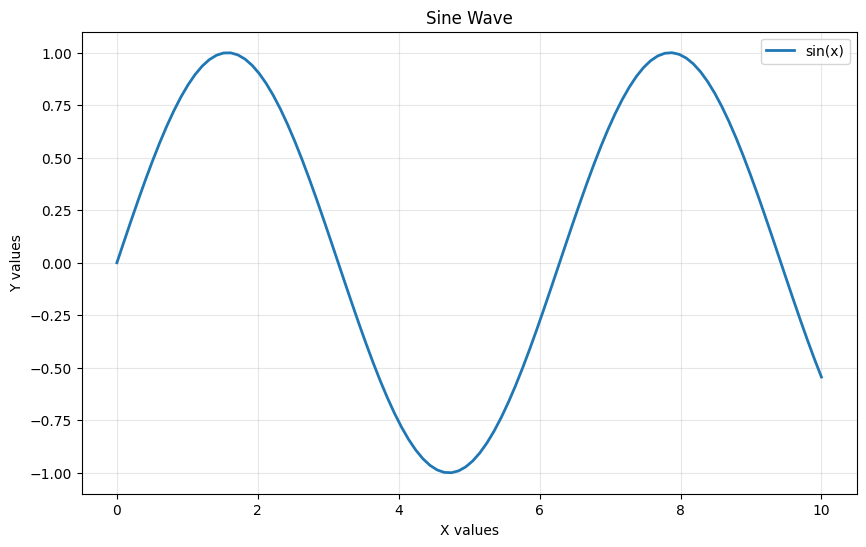

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Basic plotting
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='sin(x)', linewidth=2)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Sine Wave')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [80]:
x = np.linspace(0, 10, 100)
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8